In [ ]:
# carte de l'australie avec les emplacements des stations
# météorologiques et les prévisions météorologiques relatives

In [1]:
import folium
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_villes=pd.read_csv('AUSLONLAT.csv',sep=';')

In [3]:
villesref=pd.read_csv("VilleRef.csv",sep=";")

In [4]:
villesref.rename(columns = {'Ville':'city'}, inplace = True)

In [5]:
australian_clean=pd.read_csv("WeatherAUSFinal.csv",sep=";")
australian_clean.head(5)
a_clean_f = australian_clean[australian_clean['Date']=='2017-04-11']


In [7]:
a_clean_f.replace('No', 0, inplace=True)
a_clean_f.replace('Yes', 1, inplace=True)
a_clean_f.head(5)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,year,month,day,week
2886,2017-04-11,Albury,5.9,21.3,0.2,3.6,2.1,ESE,28.0,81.0,44.0,1021.7,1019.7,0,0,2017,4,11,15
5763,2017-04-11,BadgerysCreek,8.4,24.1,0.0,3.6,2.1,SSW,43.0,54.0,50.0,1017.7,1017.5,0,0,2017,4,11,15
8743,2017-04-11,Cobar,7.3,23.1,0.0,3.6,2.1,W,28.0,56.0,30.0,1021.7,1018.0,0,0,2017,4,11,15
11683,2017-04-11,CoffsHarbour,9.0,24.7,0.0,11.2,10.8,SSW,52.0,49.0,61.0,1015.7,1014.5,0,0,2017,4,11,15
14474,2017-04-11,Moree,8.0,25.6,0.0,3.6,2.1,WSW,44.0,53.0,33.0,1018.6,1015.0,0,0,2017,4,11,15


In [10]:
a_clean_f.rename(columns = {'Location':'city'}, inplace = True)

df_cd = pd.merge(a_clean_f, villesref, how='inner')
df_cd_1 = pd.merge(df_cd, df_villes)
df_cd_1.head(5)

,Date,city,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,...,Pressure3pm,RainToday,RainTomorrow,year,month,day,week,Radar,lat,lng
0,2017-04-11,Albury,5.9,21.3,0.2,3.6,2.1,ESE,28.0,81.0,...,1019.7,0,0,2017,4,11,15,SydneyAirport,-36.0806,146.9158
1,2017-04-11,BadgerysCreek,8.4,24.1,0.0,3.6,2.1,SSW,43.0,54.0,...,1017.5,0,0,2017,4,11,15,SydneyAirport,-33.8797222222,150.7522222222
2,2017-04-11,Cobar,7.3,23.1,0.0,3.6,2.1,W,28.0,56.0,...,1018.0,0,0,2017,4,11,15,SydneyAirport,-31.4997,145.8319
3,2017-04-11,CoffsHarbour,9.0,24.7,0.0,11.2,10.8,SSW,52.0,49.0,...,1014.5,0,0,2017,4,11,15,Brisbane,-30.298612,153.109392
4,2017-04-11,Moree,8.0,25.6,0.0,3.6,2.1,WSW,44.0,53.0,...,1015.0,0,0,2017,4,11,15,SydneyAirport,-29.4650,149.8344


In [11]:
df_villes_ref={}
for idx,lige in villesref.iterrows():
    df_villes_ref[lige['city']]= lige['Radar']
#df_villes_ref


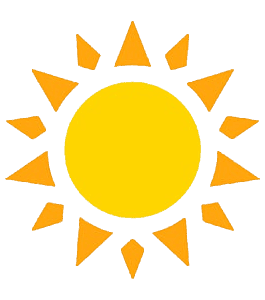
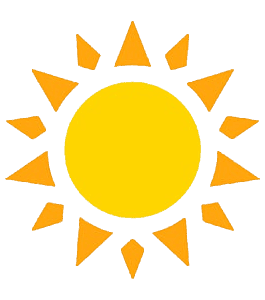
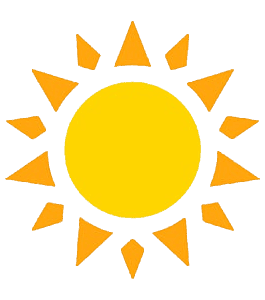
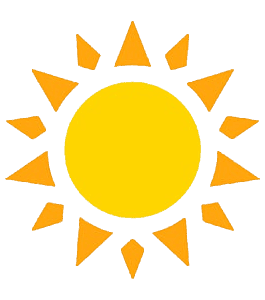
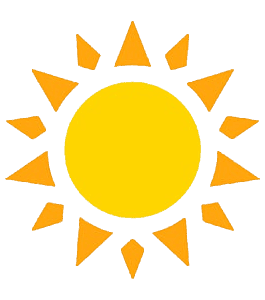
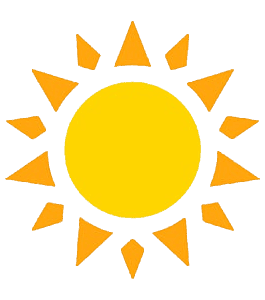
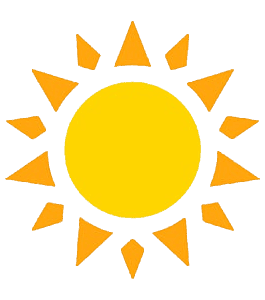
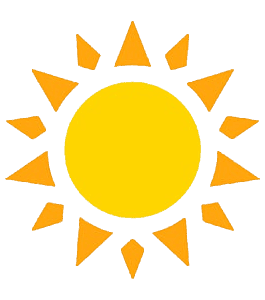
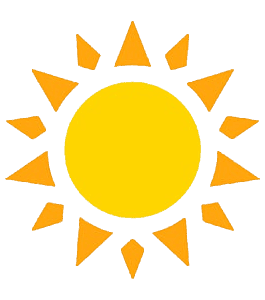
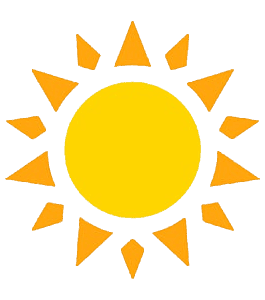
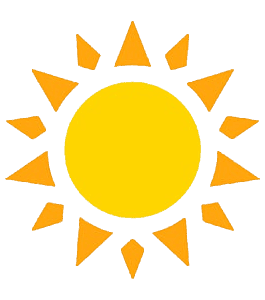
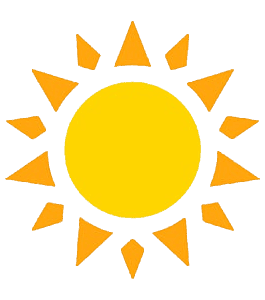
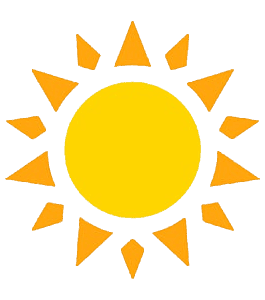
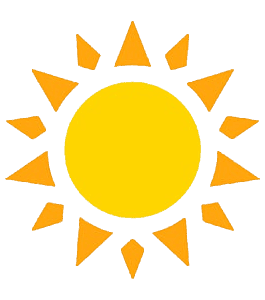
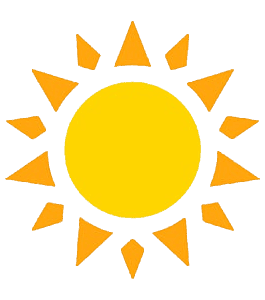
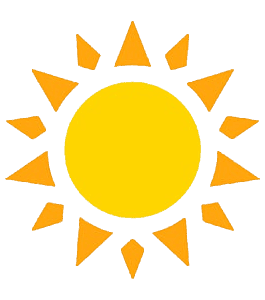
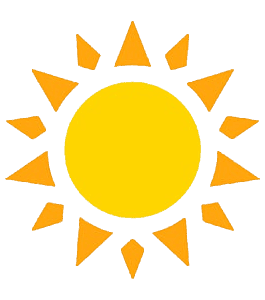
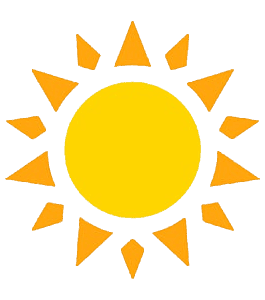
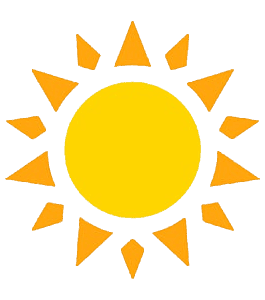
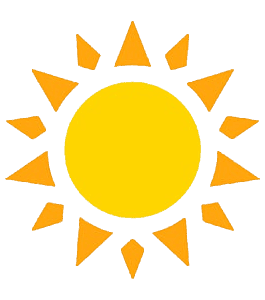
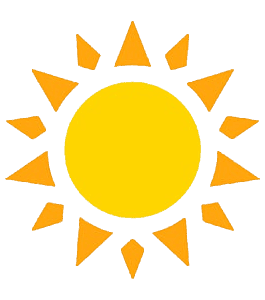
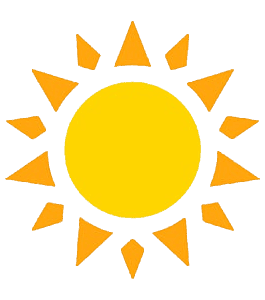
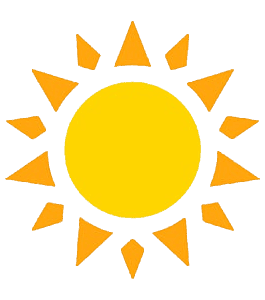
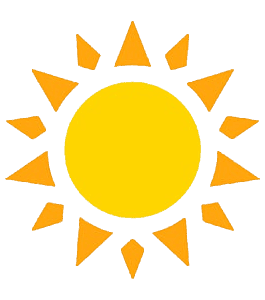
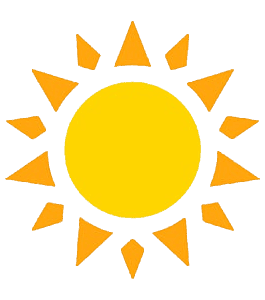
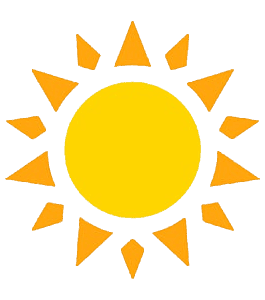
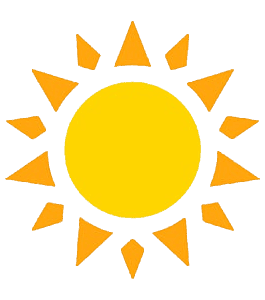
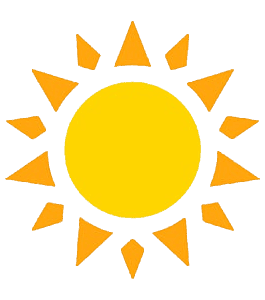
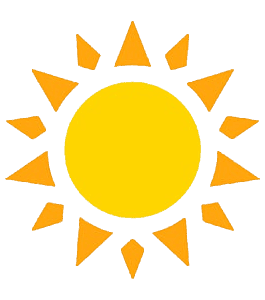
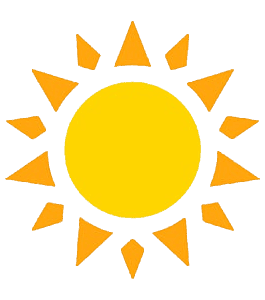
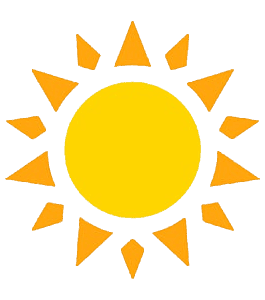
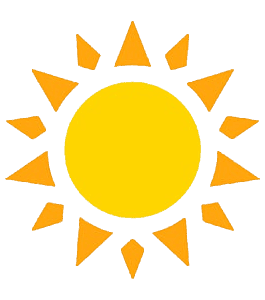
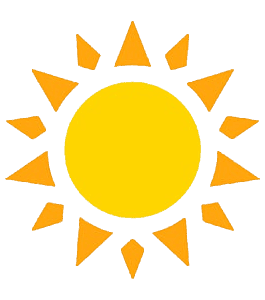
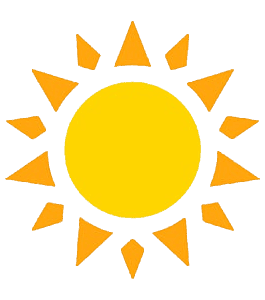

In [12]:
m=folium.Map(location=[df_cd_1[df_cd_1['city']=='Sydney']['lat'],
                       df_cd_1[df_cd_1['city']=='Sydney']['lng']],
             zoom_start=5)

url="/Users/bernardinotirri/Desktop/bernardino_codes/{}".format
urlimage=url("IconSun.png")


for index, row in df_cd_1.iterrows():
    
    if df_villes_ref[row['city']]=='isole':
        colradar='blue'
        pos=folium.features.CustomIcon(urlimage,icon_size=(30,30))
    else:
        colradar='blue'
        pos=folium.features.CustomIcon(urlimage,icon_size=(30,30))
    if row['RainTomorrow'] == 1:
        Libelle=" il pleuvra"
        popup="<h2>"+row['city']+"</h2><p>demain"+ Libelle+"</p>"
        marker=folium.Marker(location=[row['lat'], row['lng']],popup=popup,tooltip=row['city'],icon=folium.Icon(icon='tint',icon_color='blue',color=colradar))
        marker.add_to(m)
    else:
        Libelle=" il ne pleuvra pas"
        popup="<h2>"+row['city']+"</h2><p>demain"+ Libelle+"</p>"
        marker=folium.Marker(location=[row['lat'], row['lng']],popup=popup,tooltip=row['city'],icon=pos)
        marker.add_to(m)

m


In [ ]:
###### risultat de la prediction crf NSW

In [13]:
import pandas as pd
result_NSW = pd.read_csv("resultofNSW.csv",sep=";")

In [14]:
datacopy = australian_clean.copy()

In [15]:
datacopy.index.name='number_row'
datacopy.reset_index(inplace=True)

In [16]:
result_NSW.rename(columns = {'RainTomorrow':'RainTomorrowPred'}, inplace = True)

In [17]:
df_result = result_NSW[['number_row', 'RainTomorrowPred']].copy()

In [18]:
datacopy.rename(columns = {'Location':'city'}, inplace = True)
df_result_1 = datacopy.merge( right=df_result, on='number_row', how='inner')
df_result_2 = df_result_1[df_result_1['Date']=='2017-04-11']
df_result_3 = pd.merge(df_result_2, df_villes)
df_result_4 = pd.merge(df_result_3, villesref)
df_result_4.head(5)


,number_row,Date,city,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,RainToday,RainTomorrow,year,month,day,week,RainTomorrowPred,lat,lng,Radar
0,2886,2017-04-11,Albury,5.9,21.3,0.2,3.6,2.1,ESE,28.0,...,No,No,2017,4,11,15,0,-36.0806,146.9158,SydneyAirport
1,28992,2017-04-11,Richmond,8.8,25.1,0.2,2.0,2.1,S,39.0,...,No,No,2017,4,11,15,0,-33.5983,150.7511,SydneyAirport
2,46213,2017-04-11,Canberra,5.9,19.9,1.6,3.6,2.1,S,43.0,...,Yes,No,2017,4,11,15,0,-35.2931,149.1269,SydneyAirport



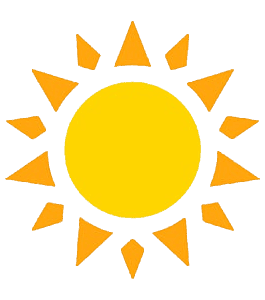
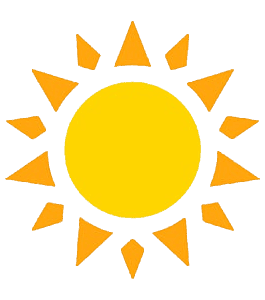
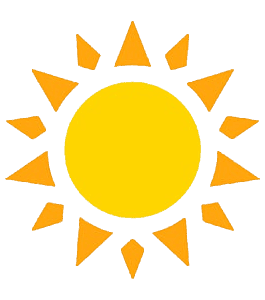

In [19]:
m=folium.Map(location=[df_cd_1[df_cd_1['city']=='Sydney']['lat'],
                       df_cd_1[df_cd_1['city']=='Sydney']['lng']],
             zoom_start=5)

url="/Users/bernardinotirri/Desktop/bernardino_codes/{}".format
urlimage=url("IconSun.png")

for index, row in df_result_4.iterrows():
    
    if df_villes_ref[row['city']]=='isole':
        colradar='blue'
        pos=folium.features.CustomIcon(urlimage,icon_size=(30,30))
    else:
        colradar='blue'
        pos=folium.features.CustomIcon(urlimage,icon_size=(30,30))
    if row['RainTomorrowPred'] == 1:
        Libelle=" il pleuvra"
        popup="<h2>"+row['city']+"</h2><p>demain"+ Libelle+"</p>"
        marker=folium.Marker(location=[row['lat'], row['lng']],popup=popup,tooltip=row['city'],icon=folium.Icon(icon='tint',icon_color='blue',color=colradar))
        marker.add_to(m)
    else:
        Libelle=" il ne pleuvra pas"
        popup="<h2>"+row['city']+"</h2><p>demain"+ Libelle+"</p>"
        marker=folium.Marker(location=[row['lat'], row['lng']],popup=popup,tooltip=row['city'],icon=pos)
        marker.add_to(m)

m

